# Euler Method 

In mechanics, we often use Euler’s method to determine the motion of an object given how the acceleration depends on the velocity and position of an object. For example, we may know that the acceleration $a(x, v)$ is given as:

$$a(x, v) = −kx − cv$$

If we know the position $x$ and the velocity $v$ at a time $t = 0$, $x(0) = x_0 = 0$ and $v(0) = v_0 = 1$ 

we can use Euler’s method to find the position and velocity after a small timestep ∆t:
$$
v_n = v(t_{n-1} + ∆t) = v(t_{n-1}) + a(v(t_{n-1}), x(t_{n-1}))∆t\\
x_n = x(t_{n-1} + ∆t) = x(t_{n-1}) + v(t_{n-1})∆t
$$
We can therefore use this scheme to find the position $x(t)$ and the velocity $v(t)$ as a function of time at the discrete values $t_i = i∆t$ in time.

(a) Write a function `acceleration(v,x,k,C)` which returns the value of $a(x, v)$

(b) Write a function `euler_step(x_old,v_old,dt,k=1,c=.01)` returning `x_new,v_new`, the values of the position and velocity at the next time step, given the position and velocity at the previous step, and the equation parameters.

(b) Write a function `euler(k=1,c=0,x0=0,v0=1,dt=.01,t_0=0,t_max=10)` returning three arrays `(ts,xs,ys)` with the values of the time, position, and velocity, given the initial condition and the system parameters (`dt` is the time step, `t_max`the maximum integration time and `t_0` the initial time). 

(c) For `k=10`, `c=0.10`, `t_max=10` save to a file a plot including two subplots with the plot of the position and velocity. Add suitable axes name, legend, and title. 
Try to generate file names for the figure of the type `euler-k-0.10-c-0.10-dt-0.01.png` 
where the numbers are the values of the parameters (see https://pyformat.info). 
Make the position plot blue and the velocity plot orange.

(d) Is the choice of the time step `dt` important? Try to review your undergraduate class on this topic and porpduce a figure that illustrate the influence of `dt`. Include a caption for the figure explaining the finding.

We ask to submit

1 - The figure of part (c)

2 - The figure of part (d), with the caption. 

3 - A script `euler.py`, which should produce the two figures when executed. 

We will evaluate the following points:

* Does the code run wihtout error?

* Does the code  produce the correct results?

* Are the figures clear and respect the requirements?

* Is the PEP8 codying style respected? (see http://sametmax.com/le-pep8-en-resume/)

Note: You can check automatically the codying style in several way. For example online: http://pep8online.com. There are also several tools for automatic formatting, e.g. https://pypi.org/project/autopep8/.

In [1]:
#a

def acceleration(v, x, k, c):
    a = -k*x -c*v
    return a

# Test
v, x, k, c = 2, -0.5, 2, -3
acceleration(v, x, k, c)

7.0

In [14]:
#b

def euler_step(x_old,v_old,dt,k, c):
    v_new = v_old + acceleration(v_old, x_old, k, c)*dt
    x_new = x_old + v_old*dt
    return x_new, v_new

# Test
k=1
c=.01
x_old, v_old, dt = 3, 4, 1
euler_step(x_old, v_old, dt, k=1, c=.01)

(7, 0.96)

In [15]:
#b
import numpy as np

def euler(k=1,c=0,x0=0,v0=1,dt=.01,t_0=0,t_max=10):
        ts = np.arange(t_0, t_max, dt)
        xs = np.zeros([len(ts)])
        ys = np.ones([len(ts)])
        
        for i in range(len(ts)-1):
            xs[i+1], ys[i+1] = euler_step(xs[i], ys[i], dt=.01, k=1, c=0)
        return ts, xs, ys

# Test
euler(k=1,c=0,x0=0,v0=1,dt=.01,t_0=0,t_max=10)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
        1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
        1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
        1.43, 1.44, 1.45, 1.46, 1.47, 

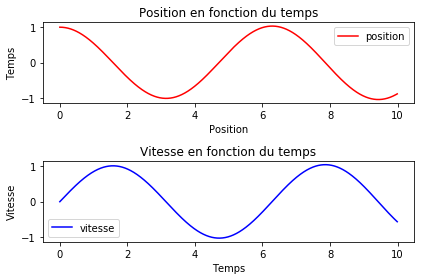

In [17]:
import matplotlib.pyplot as plt

ts, ys, xs = euler(k=10,c=0.1,x0=0,v0=1,dt=.01,t_0=0,t_max=10)

fig = plt.figure(1)
plt.subplot(211)
plt.title('Position en fonction du temps')
plt.plot(ts, xs, 'r', label='position')
plt.xlabel('Position')
plt.ylabel('Temps')
plt.legend()

plt.subplot(212)
plt.title('Vitesse en fonction du temps')
plt.plot(ts, ys, 'b', label='vitesse')
plt.xlabel('Temps')
plt.ylabel('Vitesse')
plt.legend()
fig.tight_layout()
plt.show()


# Question d
## dt is very important because our solution depends on this parameter also. Indeed, if the value of dt is to high, the solution will diverge. Thats why we need to optimize it